In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
import feyn

# Model agnostic 
from typing import Optional, List, Callable, Dict, Any, List
from pathlib import Path
from utils import ChiefBldr, QLatticeWrapper
from dft_model import DFT

This version of Feyn and the QLattice is available for academic, personal, and non-commercial use. By using the community version of this software you agree to the terms and conditions which can be found at https://abzu.ai/eula.

In [2]:
# Get the directory this file lives in
nb_dir = Path.cwd() # notebook directory
project_root = nb_dir.parents[0] # project directory
data_path = project_root / "datasets" / "processed_well_data.csv"

includ_cols = ['Dia', 'Dev(deg)','Area (m2)', 'z','GasDens','LiquidDens', 'g (m/s2)', 'P/T','friction_factor', 'critical_film_thickness']
D = ChiefBldr(path=data_path, includ_cols=includ_cols, test_size=0.01, scale=False)

In [3]:
# define xgboost pipeline
def dft(
        hparams: Dict[str, Any]
):
    dft = DFT(
        **hparams,
    )

    return dft

hparam_grid = {
            "dev_tol":   [1e-3],
            "feature_tol": [1.0]
        }

# train model and optimize hyperparameters via grid search 
trained_model = D.evolv_model(build_model=dft, hparam_grid=hparam_grid, k_folds=0)

Optimization terminated successfully.
         Current function value: 15723977489.684744
         Iterations: 47
         Function evaluations: 145054
Training set score: 0.4585365853658537
Test set score: 0.3333333333333333


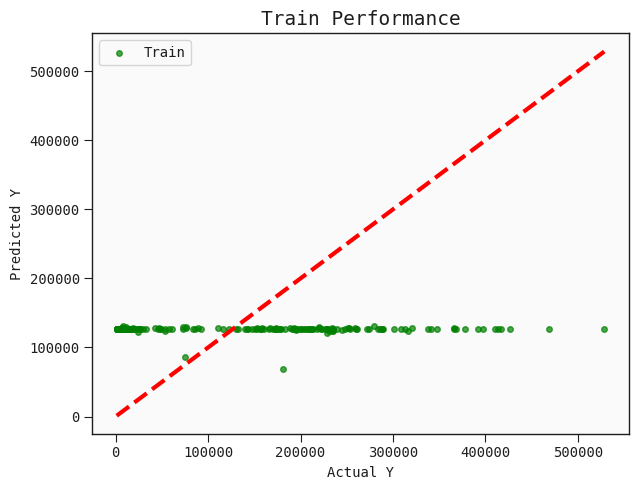

In [4]:
   # Plot Training and Combined Performance
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(D.y_train, D.y_train_pred, label='Train', color='green', alpha=0.7)
plt.plot([D.y.min(), D.y.max()], [D.y.min(), D.y.max()], 'r--')
plt.xlabel("Actual Y")
plt.ylabel("Predicted Y")
plt.title("Train Performance")
plt.legend()


plt.tight_layout()
plt.show()
